In [53]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [17]:
dt=pd.read_csv("german_credit.csv")

dt.shape


(1000, 21)

In [16]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable


list(dt)

['default',
 'account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker']

In [18]:
dt.sample(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
812,1,< 0 DM,36,critical account/ other credits existing (not ...,car (used),9629,... < 100 DM,4 <= ... < 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",24,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
88,0,< 0 DM,18,existing credits paid back duly till now,car (new),2249,100 <= ... < 500 DM,4 <= ... < 7 years,4,male : single,...,3,"if not A121/A122 : car or other, not in attrib...",30,none,own,1,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes
690,0,< 0 DM,15,critical account/ other credits existing (not ...,radio/television,975,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,...,3,if not A121 : building society savings agreeme...,25,none,own,2,skilled employee / official,1,none,yes
941,0,no checking account,10,existing credits paid back duly till now,car (new),1546,... < 100 DM,1 <= ... < 4 years,3,male : single,...,2,real estate,31,none,own,1,unskilled - resident,2,none,no
475,1,< 0 DM,18,no credits taken/ all credits paid back duly,radio/television,3114,... < 100 DM,... < 1 year,1,female : divorced/separated/married,...,4,if not A121 : building society savings agreeme...,26,none,rent,1,skilled employee / official,1,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [49]:
X=dt.drop(['default'],axis=1)
Y=dt['default']

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.5,random_state=1)

print('The training input set size is',Xtrain.shape)

The training input set size is (500, 20)


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [25]:
Xtrainn= pd.get_dummies(Xtrain,columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])
Xtestt=pd.get_dummies(Xtest,columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])

In [24]:
# Print Shape of model data
Xtrainn.shape

(500, 61)

In [26]:
Xtestt.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [27]:
Xtrainn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_in_month,500.0,20.978,11.850671,4.0,12.00,18.0,24.00,60.0
credit_amount,500.0,3323.076,2875.025473,343.0,1369.25,2342.5,4070.25,18424.0
installment_as_income_perc,500.0,2.916,1.125824,1.0,2.00,3.0,4.00,4.0
present_res_since,500.0,2.860,1.076437,1.0,2.00,3.0,4.00,4.0
age,500.0,36.024,11.792266,19.0,27.00,33.0,43.00,75.0
credits_this_bank,500.0,1.400,0.576771,1.0,1.00,1.0,2.00,4.0
people_under_maintenance,500.0,1.138,0.345245,1.0,1.00,1.0,1.00,2.0
account_check_status_0 <= ... < 200 DM,500.0,0.262,0.440163,0.0,0.00,0.0,1.00,1.0
account_check_status_< 0 DM,500.0,0.278,0.448462,0.0,0.00,0.0,1.00,1.0
account_check_status_>= 200 DM / salary assignments for at least 1 year,500.0,0.072,0.258747,0.0,0.00,0.0,0.00,1.0


In [28]:
Xtrainn.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,-0.038696,...,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,-0.088007,...,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831,-0.062949,0.062949
installment_as_income_perc,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,-0.041112,...,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,-0.035688,...,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494,-0.087317,0.087317
age,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,0.051976,...,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,-0.032228,...,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274,-0.017713,0.017713
people_under_maintenance,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,0.000718,...,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,-0.165964,...,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607,-0.051992,0.051992
account_check_status_< 0 DM,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,-0.172841,...,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149,0.010024,-0.010024
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.038696,-0.088007,-0.041112,-0.035688,0.051976,-0.032228,0.000718,-0.165964,-0.172841,1.000000,...,0.038410,-0.074618,-0.078234,0.000515,0.098519,0.042601,0.063004,-0.063004,-0.017373,0.017373


### Drop the original variables which are converted to dummy

In [32]:
Xtrainn.drop(['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'],axis=1)
Xtestt.drop(['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'],axis=1)


KeyError: "labels ['account_check_status' 'credit_history' 'purpose' 'savings'\n 'present_emp_since' 'personal_status_sex' 'other_debtors' 'property'\n 'other_installment_plans' 'housing' 'job' 'telephone' 'foreign_worker'] not contained in axis"

In [ ]:
## The above error shows the orginal variables are removed at time of dummy convertion so the orginal columns dont necessitate removal seperately

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [61]:

X= pd.get_dummies(X,columns=['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])


Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [62]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=999)
r.fit(Xtrain,ytrain)
s=r.predict(Xtest)
print("The accuracy after using Random forest Classifier is:",accuracy_score(s,ytest))

The accuracy after using Random forest Classifier is: 0.75


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [63]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix for the model is \n:",confusion_matrix(s,ytest))

The confusion matrix for the model is 
: [[198  59]
 [ 16  27]]


### Q6 Show the list of the features importance( 1 Marks)

In [64]:
r.feature_importances_

array([0.07556698, 0.10144889, 0.03664561, 0.03270565, 0.07840192,
       0.01907678, 0.01082583, 0.01519325, 0.02892719, 0.00702639,
       0.04825694, 0.00758591, 0.03013166, 0.00934399, 0.01487686,
       0.01276379, 0.00539015, 0.01202242, 0.01838858, 0.01284863,
       0.01413767, 0.00492701, 0.00173028, 0.01260531, 0.00218063,
       0.00083527, 0.00876968, 0.01998094, 0.00934621, 0.00590399,
       0.01349773, 0.01477682, 0.01349856, 0.01539625, 0.01310186,
       0.00797897, 0.01513129, 0.00631637, 0.0073537 , 0.0142251 ,
       0.00716571, 0.00824173, 0.01130907, 0.01299511, 0.01466645,
       0.01451069, 0.00971252, 0.01352688, 0.01759379, 0.0073087 ,
       0.00657133, 0.01385582, 0.01067313, 0.0120104 , 0.01500888,
       0.00183988, 0.01090408, 0.01356491, 0.01375206, 0.00289427,
       0.00277352])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
# Use below values
num_folds = 10
seed = 77

In [67]:
#Validate the Random Forest model build above using k fold

In [75]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
kf1=KFold(n_splits=2, random_state=None, shuffle=False)
print(kf1)

KFold(n_splits=2, random_state=None, shuffle=False)
KFold(n_splits=2, random_state=None, shuffle=False)


In [0]:
#Calculate Mean score

In [76]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(kf1, Xtest, ytest, cv=3))

TypeError: estimator should be an estimator implementing 'fit' method, KFold(n_splits=2, random_state=None, shuffle=False) was passed

In [0]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

In [79]:
print("The confusion matrix for the model is \n:",confusion_matrix(s,ytest))

The confusion matrix for the model is 
: [[198  59]
 [ 16  27]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

Text(0.5,1,'Selecting k with the Elbow Method')

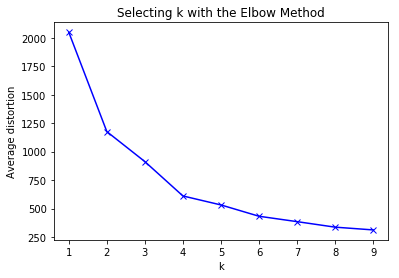

In [83]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)

distortion=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X)
    #print(k)
    #print(model.cluster_centers_)
    distortion.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / dt.shape[0])
   # print(meanDistortions)


plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
